<a href="https://colab.research.google.com/github/ClaudioCaniullan/Machine-Learning-Support-Vector-Machine-Aplicaciones/blob/main/Support_Vector_Machine_Breast_Cancer_ejemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**¿Qué librerías vamos a usar?**

Pandas

matplotlib

sklearn.model_selection import train_test_split

**Novedad**

from sklearn import svm

**class sklearn.svm.SVC**(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

C float, predeterminado = 1.0 Parámetro de regularización. La fuerza de la regularización es inversamente proporcional a C. Debe ser estrictamente positiva. La penalización es una penalización de 12 al cuadrado.

kernel {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default = ’rbf’ Especifica el tipo de kernel que se utilizará en el algoritmo. Debe ser "lineal", "poli", "rbf", "sigmoide", "precalculado" o invocable. Si no se proporciona ninguno, se utilizará "rbf". Si se proporciona un invocable, se utiliza para calcular previamente la matriz del núcleo a partir de matrices de datos; esa matriz debe ser una matriz de formas (n_samples, n_samples).

gradoint, predeterminado = 3 Grado de la función del núcleo polinomial ("poli"). Ignorado por todos los demás núcleos.

gamma {"scale", "auto"} o flotante, predeterminado = "scale" Coeficiente de kernel para "rbf", "poli" y "sigmoide".

si se pasa gamma = 'scale' (predeterminado), entonces usa 1 / (n_features * X.var ()) como valor de gamma,

si es "auto", utiliza 1 / n_features.

coef0 float, predeterminado = 0.0 Término independiente en la función del núcleo. Solo es significativo en "poli" y "sigmoide".

shrinking bool, predeterminado = True Ya sea para usar la heurística de encogimiento. Consulte la Guía del usuario - https://scikit-learn.org/stable/modules/svm.html#shrinking-svm

probability bool, predeterminado = Falso Ya sea para habilitar estimaciones de probabilidad. Esto debe estar habilitado antes de llamar al ajuste, ralentizará ese método, ya que utiliza internamente una validación cruzada de 5 veces, y predict_proba puede ser inconsistente con predict.

tol float, predeterminado = 1e-3 Tolerancia al criterio de parada.

cache_size float, predeterminado = 200 Especifique el tamaño de la caché del kernel (en MB).

class_weight None o "balanceado", predeterminado = None Establezca el parámetro C de la clase i en class_weight [i] * C para SVC. Si no se da, se supone que todas las clases tienen un peso uno. El modo "balanceado" utiliza los valores de y para ajustar automáticamente los pesos inversamente proporcionales a las frecuencias de clase en los datos de entrada como n_samples / (n_classes * np.bincount (y))

verbose bool, predeterminado = False Habilite la salida detallada. Tenga en cuenta que esta configuración aprovecha una configuración de tiempo de ejecución por proceso en lib svm que, si está habilitada, puede no funcionar correctamente en un contexto multiproceso.

max_iter int, predeterminado = -1 Límite estricto de iteraciones dentro del solucionador, o -1 si no hay límite.

decision_function_shape {‘ovo’, ‘ovr’}, default = ’ovr’ Ya sea para devolver una función de decisión one-vs-rest ('ovr') de shape (n_samples, n_classes) como todos los demás clasificadores, o la función de decisión original one-vs-one ('ovo') de libsvm que tiene shape (n_samples , n_clases * (n_clases - 1) / 2). Sin embargo, uno contra uno ("ovo") siempre se utiliza como estrategia de clases múltiples. El parámetro se ignora para la clasificación binaria.

Modificado en la versión 0.19: decision_function_shape es "ovr" por defecto.

Nuevo en la versión 0.17: se recomienda decision_function_shape = ’ovr’.

Modificado en la versión 0.17: Deprecated decision_function_shape = ’ovo’ y None.

break_tiesbool, predeterminado = False Si es verdadero, decision_function_shape = 'ovr', y el número de clases> 2, predict romperá los lazos de acuerdo con los valores de confianza de decision_function; de lo contrario, se devuelve la primera clase entre las clases empatadas. Tenga en cuenta que romper los lazos tiene un costo computacional relativamente alto en comparación con una simple predicción.

Nuevo en la versión 0.22.

random_state int, instancia de RandomState o None, predeterminado = None Controla la generación de números pseudoaleatorios para mezclar los datos para estimaciones de probabilidad. Se ignora cuando la probabilidad es falsa. Pase un int para una salida reproducible a través de múltiples llamadas a funciones

In [56]:
from sklearn import datasets
 
cancer_data = datasets.load_breast_cancer()
print(cancer_data.data[5])
print(cancer_data.data.shape)
#target set
print(cancer_data.target)

[1.245e+01 1.570e+01 8.257e+01 4.771e+02 1.278e-01 1.700e-01 1.578e-01
 8.089e-02 2.087e-01 7.613e-02 3.345e-01 8.902e-01 2.217e+00 2.719e+01
 7.510e-03 3.345e-02 3.672e-02 1.137e-02 2.165e-02 5.082e-03 1.547e+01
 2.375e+01 1.034e+02 7.416e+02 1.791e-01 5.249e-01 5.355e-01 1.741e-01
 3.985e-01 1.244e-01]
(569, 30)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 

In [57]:
from sklearn.model_selection import train_test_split
 
cancer_data = datasets.load_breast_cancer()
 
X_train, X_test, y_train, y_test = train_test_split(cancer_data.data, cancer_data.target, test_size=0.4,random_state=109)
from sklearn import svm
#create a classifier
clf = svm.SVC(kernel="linear")
#entrenamiento del modelo
clf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [58]:
#Predicción
y_pred = clf.predict(X_test)
print(y_pred)
print(y_test)
from sklearn import metrics
#accuracy
print("acuracy:", metrics.accuracy_score(y_test,y_pred))
#precision score
print("precision:", metrics.precision_score(y_test,y_pred))
#recall score
print("recall" , metrics.recall_score(y_test,y_pred))
print(metrics.classification_report(y_test, y_pred))

[1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1
 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1
 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1
 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0
 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0
 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0
 1 0 0 1 0 0]
[1 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1
 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1
 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1
 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 0
 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0
 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0
 1 0 0 1 0 0]
acuracy: 0.9649122807017544
precision: 0.9642857142857143
recall 0.97826

Matriz de Confusión:
[[ 85   5]
 [  3 135]]


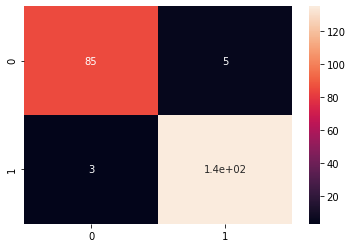

In [59]:
#Verifico la matriz de Confusión
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

sn.heatmap(matriz, annot=True)
plt.show()

![image.png](attachment:image.png)

In [60]:
from sklearn.metrics import accuracy_score
#Exactitud - La exactitud (accuracy) mide el porcentaje de casos que el modelo ha acertado
accuracy_score(y_test, y_pred)

0.9649122807017544

In [61]:
# Precision - Con la métrica de precisión podemos medir la calidad del modelo de machine learning en tareas de clasificación.
#Responde a la pregunta ¿qué porcentaje de lo identificado como positivo es realmente correcto?
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='micro')

0.9649122807017544

In [62]:
# Recall o Sensibilidad - ¿Qué porcentaje de los valores positivos fueron bien identificados?
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='micro')

0.9649122807017544

In [63]:
#rendimiento combinado de la precisión y la sensibilidad  
from sklearn.metrics import f1_score 
f1_score(y_test, y_pred, average='micro')

0.9649122807017544